In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

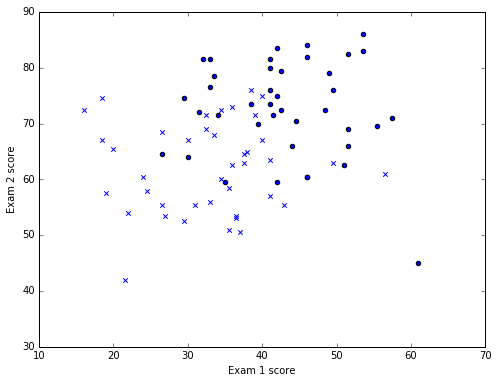

In [2]:
# 读取数据
x_arr = np.loadtxt('data/college-admit/x.dat')
y_arr = np.loadtxt('data/college-admit/y.dat')

# 标准化处理（利用梯度下降时需要标准化处理数据）
x_mean = np.mean(x_arr, 0)
x_std = np.std(x_arr, 0)
x_arr_scale = (x_arr - x_mean) / x_std
# 组装截距
x_arr_scale = np.append(np.ones((len(x_arr_scale), 1)), x_arr_scale, 1)
x_arr = np.append(np.ones((len(x_arr), 1)), x_arr, 1)

# 绘制数据
plt.figure(1, figsize=(8, 6))
for k in range(len(x_arr)):
    if y_arr[k] > 0:
        plt.scatter(x_arr[k][1], x_arr[k][2])
    else:
        plt.scatter(x_arr[k][1], x_arr[k][2], marker='x')
plt.xlabel('Exam 1 score', fontsize='medium'); plt.ylabel('Exam 2 score', fontsize='medium')
plt.show()

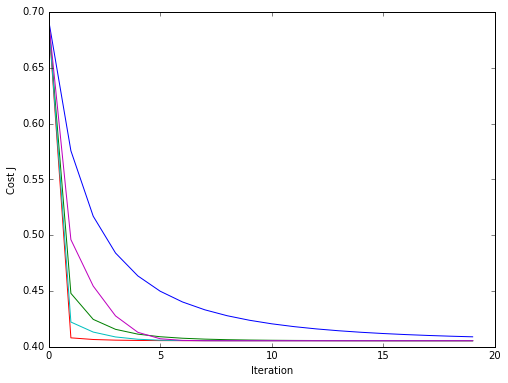

In [3]:
def sigmoid(z):
    """ sigmoid函数
    
    :param z: 
    :return: 
    """
    return 1.0 / (1.0 + np.exp(-1.0 * z))

def gradient_descent(_x_arr, _y_arr, _thetas, _alpha=12):
    """ 梯度下降函数
    
    :param _x_arr: 各样本的特征值。ndarray类型 
    :param _y_arr: 各样本的标签。ndarray类型 
    :param _thetas: 模型参数。ndarray类型 
    :param _alpha: 学习率
    :return: 更新后的模型参数
    """
    _thetas_new = _thetas.copy()
    for j in range(_x_arr.shape[1]):
        sum_err = 0.0
        for i in range(_x_arr.shape[0]):
            sum_err += (sigmoid((np.matrix(_thetas) * np.matrix(_x_arr[i]).T).item(0, 0)) - _y_arr[i]) * _x_arr[i,j]
        _thetas_new[j] = _thetas[j] - _alpha * sum_err / _x_arr.shape[0]
    return _thetas_new

plt.figure(1, figsize=(8, 6))

# 对比不同学习率的收敛速度。最后是一次学习率为12，迭代了12次，已经收敛
for alpha in [1, 3, 5, 8, 12]:
    thetas_gd = np.array([0.0, 0.0, 0.0])  # 初始参数
    err_gd_list = [0.0] * 20  # 统计误差
    for j in range(20):
        err_gd = 0
        for i in range(x_arr.shape[0]):
            err_gd += np.log(sigmoid((np.matrix(thetas_gd) * np.matrix(x_arr_scale[i]).T).item(0, 0))) * y_arr[i] +\
                      np.log(1 - sigmoid((np.matrix(thetas_gd) * np.matrix(x_arr_scale[i]).T).item(0, 0))) * (1 - y_arr[i])
        err_gd = -err_gd / x_arr.shape[0]
        err_gd_list[j] = err_gd
    
        # 梯度下降迭代求解参数
        thetas_gd = gradient_descent(x_arr_scale, y_arr, thetas_gd, alpha)
        
    # 绘制当前学习率下，每次迭代后的收敛情况
    plt.plot(range(20), err_gd_list, label=alpha)
    
plt.xlabel('Iteration', fontsize='medium'); plt.ylabel('Cost J', fontsize='medium')
plt.show()

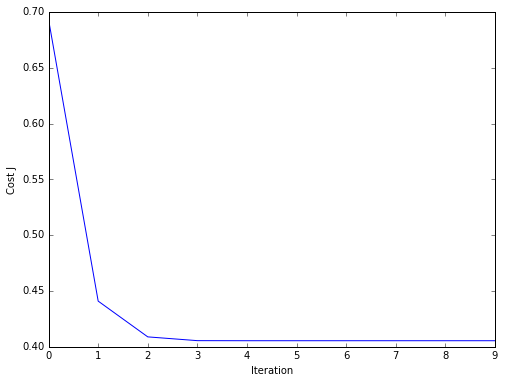

In [4]:
def newton(_x_arr, _y_arr, _thetas):
    """ 牛顿法

    :param _x_arr: 各样本的特征值。ndarray类型
    :param _y_arr: 各样本的标签。ndarray类型
    :param _thetas: 模型参数。ndarray类型
    :return: 更新后的模型参数
    """
    sum_gd = np.matrix([0.0, 0.0, 0.0]).T
    sum_hs = np.matrix(np.zeros((_x_arr.shape[1], _x_arr.shape[1])))
    for i in range(_x_arr.shape[0]):
        _x_i_mat = np.matrix(_x_arr[i]).T
        g = sigmoid((np.matrix(_thetas) * _x_i_mat).item(0, 0))
        sum_gd += (g - _y_arr[i]) * _x_i_mat
        sum_hs += (g * (1 - g)) * _x_i_mat * _x_i_mat.T
        
    gd = sum_gd / _x_arr.shape[0]  # 梯度
    hs = sum_hs / _x_arr.shape[0]  # hession矩阵
    
    _thetas -= np.array(hs.I * gd).ravel()
    
    return _thetas

plt.figure(1, figsize=(8, 6))

thetas_nt = np.array([0.0, 0.0, 0.0])  # 初始参数
err_nt_list = [0.0] * 10  # 统计误差
for j in range(10):
    err_nt = 0
    for i in range(x_arr.shape[0]):
        err_nt += np.log(sigmoid((np.matrix(thetas_nt) * np.matrix(x_arr[i]).T).item(0, 0))) * y_arr[i] +\
        np.log(1 - sigmoid((np.matrix(thetas_nt) * np.matrix(x_arr[i]).T).item(0, 0))) * (1 - y_arr[i])
    err_nt = -err_nt / x_arr.shape[0]
    err_nt_list[j] = err_nt

    # 牛顿法迭代求解参数
    thetas_nt = newton(x_arr, y_arr, thetas_nt.copy())

# 绘制每次迭代后的收敛情况，可以发现牛顿法比梯度下降法收敛的快
plt.plot(range(10), err_nt_list, label=alpha)  
plt.xlabel('Iteration', fontsize='medium'); plt.ylabel('Cost J', fontsize='medium')
plt.show()

thetas of gradient descnet: [-0.056595    1.46279349  1.56073685]
thetas of newton`s method:  [-16.37874341   0.14834077   0.15890845]
test result of gradient descent: 0.668021864744
test result of newton`s method:  0.668021864022


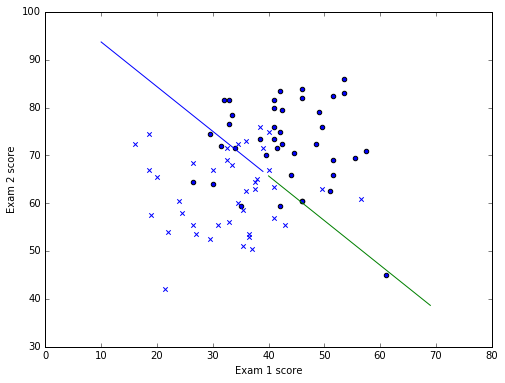

In [5]:
# 打印参数。牛顿法和梯度下降法的参数不同，因为梯度下降法对特征进行了归一化处理
print('thetas of gradient descnet:', thetas_gd)
print('thetas of newton`s method: ', thetas_nt)

# 测试用例。可以发现虽然参数不同，但牛顿法和梯度下降法最终的结果是一致的
new_test = np.array([[20, 80]])
new_test_scale = (new_test - x_mean) / x_std
new_test_scale = np.append(np.ones((len(new_test_scale), 1)), new_test_scale, 1)
new_test = np.append(np.ones((len(new_test), 1)), new_test, 1)

print('test result of gradient descent:', 1 - sigmoid((np.matrix(thetas_gd) * np.matrix(new_test_scale).T).item(0, 0)))
print('test result of newton`s method: ', 1 - sigmoid((np.matrix(thetas_nt) * np.matrix(new_test).T).item(0, 0)))

# 绘制分割线 牛顿法和梯度下降法的线基本是重合的，这里各画一半
plt.figure(1, figsize=(8, 6))
for k in range(len(x_arr)):
    if y_arr[k] > 0:
        plt.scatter(x_arr[k][1], x_arr[k][2])
    else:
        plt.scatter(x_arr[k][1], x_arr[k][2], marker='x')

# 牛顿法的结果
x1_nt = list(range(10, 40))
x2_nt = [-1.0 * (thetas_nt[0] + thetas_nt[1] * k) / thetas_nt[2] for k in x1_nt]
plt.plot(x1_nt, x2_nt)

# 梯度下降的结果，注意对归一化的值进行反处理
x1_gd = list(range(40, 70))
x2_gd = -1.0 * (thetas_gd[0] + thetas_gd[1] * ((np.array(x1_gd) - x_mean[0]) / x_std[0])) / thetas_gd[2]
x2_gd = np.array(x2_gd) * x_std[1]+ x_mean[1]
plt.plot(x1_gd, x2_gd)

plt.xlabel('Exam 1 score', fontsize='medium'); plt.ylabel('Exam 2 score', fontsize='medium')
plt.show()